### 1. Wybór datasetu

Szukaliśmy datasetu który mógłby być interesujący i mający jakieś zastosowanie praktyczne.\
Z początku skupialiśmy się na przeszukaniu strony Głównego Urzędu Statystycznego (https://stat.gov.pl/), skończyło się jednak na wyborze datasetu z Kaggla który po prostu miał słodkiego słodkiego chomika jako maskotkę

![title](img/hamster.bmp)

"Dataset for Link Phishing Detection"\
Dataset wyglądał na idealny do nauki:
 - Posiadał wiele kolumn (87) o bardzo różnych typach (Integer 71, Decimal 13, String 2, Other 1)
 - Zawierał sporą liczbę wierszy (19430)

In [34]:
# do dzieła wczytajmy nasz dataset !!!
import pandas as pd

df = pd.read_csv('data/dataset_link_phishing.csv', low_memory=False) # dirname, filename to zmienne powyrzej zdefiniowane jako ścieżka do datasetu podpiętego do tego dokumentu 

### 2.1 Przeglądanie danych

Poznaliśmy podstawowe narzędza bibliotek Pandas oraz Numpy, w tym narzędzia do rozeznania się w tak ogromnych zbiorach danych jaki sobie wybraliśmy

Poznanie kolumn - jakie dane będziemy analizować, jakich są typów 

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  19431 non-null  int64  
 1   url                         19431 non-null  object 
 2   url_length                  19431 non-null  int64  
 3   hostname_length             19431 non-null  int64  
 4   ip                          19431 non-null  int64  
 5   total_of.                   19431 non-null  int64  
 6   total_of-                   19431 non-null  int64  
 7   total_of@                   19431 non-null  int64  
 8   total_of?                   19431 non-null  int64  
 9   total_of&                   19431 non-null  int64  
 10  total_of=                   19431 non-null  int64  
 11  total_of_                   19431 non-null  int64  
 12  total_of~                   19431 non-null  int64  
 13  total_of%                   194

Wstępnie przejrzenie jak wyglądają poznane wcześniej kolumny w datasecie, jakie mają wartości, co oznaczają. To okazało się być niebanalne, bo z początku nie doczytaliśmy, że parametr taki jak 'ip' zwraca jedynie wartość 0 lub 1 w zależności od tego czy ip było znane czy nie.

In [36]:
print(df.head())

   Unnamed: 0                                                url  url_length  \
0           0     http://www.progarchives.com/album.asp?id=61737          46   
1           1  http://signin.eday.co.uk.ws.edayisapi.dllsign....         128   
2           2  http://www.avevaconstruction.com/blesstool/ima...          52   
3           3                              http://www.jp519.com/          21   
4           4                       https://www.velocidrone.com/          28   

   hostname_length  ip  total_of.  total_of-  total_of@  total_of?  total_of&  \
0               20   0          3          0          0          1          0   
1              120   0         10          0          0          0          0   
2               25   0          3          0          0          0          0   
3               13   0          2          0          0          0          0   
4               19   0          2          0          0          0          0   

   ...  domain_in_title  domain_

df.describe()
Określa statystyczne właściwości danych w kolumnach, podobnie jak df.head() na przykładzie kilku kolumn z początku, środka i końca dokumentu

In [37]:
print(df.describe())

         Unnamed: 0    url_length  hostname_length            ip  \
count  19431.000000  19431.000000     19431.000000  19431.000000   
mean    5008.529412     61.134527        21.101127      0.649529   
std     3051.763518     56.205292        10.719241      0.477130   
min        0.000000     12.000000         4.000000      0.000000   
25%     2428.500000     33.000000        15.000000      0.000000   
50%     4857.000000     47.000000        19.000000      1.000000   
75%     7286.000000     71.000000        24.000000      1.000000   
max    11429.000000   1641.000000       214.000000      1.000000   

          total_of.     total_of-     total_of@     total_of?     total_of&  \
count  19431.000000  19431.000000  19431.000000  19431.000000  19431.000000   
mean       2.485564      0.997684      0.021872      0.141012      0.164994   
std        1.383635      2.076148      0.155149      0.364934      0.842362   
min        1.000000      0.000000      0.000000      0.000000      0.00

Miejscami przejrzenie pierwszych kilku wierszy zupełnie nie pozwala na rozeznaniu się jakie mogą być wartości w całym datasecie, dla tego niektóre kolumny sprawdzaliśmy osobno

In [38]:
print("IP unique values in array",df['ip'].unique())
print("google_index unique values in array",df['google_index'].unique())
print("Status unique values in array",df['status'].unique())

IP unique values in array [0 1]
google_index unique values in array [0 1]
Status unique values in array ['phishing' 'legitimate']


### 2.2 Czyszczenie i przygotowanie danych

Należy zadać sobie pytanie, czy dane które uzyskaliśmy są kompletne 

In [39]:
print(df.isnull().sum())

Unnamed: 0         0
url                0
url_length         0
hostname_length    0
ip                 0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 87, dtype: int64


Wszystko wygląda super, dane sąkompletne

Kolejnym krokiem może być podział datasetu w zależności od labelu tak aby łatwiej było później przeglądać dane

In [40]:
df_phishing = df[df['status'].isin(['legitimate'])]
df_legit = df[df['status'].isin(['phishing'])]

### 3 Wizualizacja

W zespole podzieliliśmy się w taki sposób, że każdy skupił się dosyć dokładnie na jednej z zaproponowanych na zajęciach bibliotek wizualizujących dane.\
Ja wziąłem dobrze znanego matplitliba, ale zacząłem się w niego wgryzać i znajdować dosyć interesujące żeczy których nie wiedziałem przykładowo tworzenie bardziej złożonych layoutów figures.\
Poza wesołym przeglądem możliwości bibliotek rozpoczęliśmy przegląd danych. W tym celu pomogły głównie wykresy histogramowe i skrzypcowe

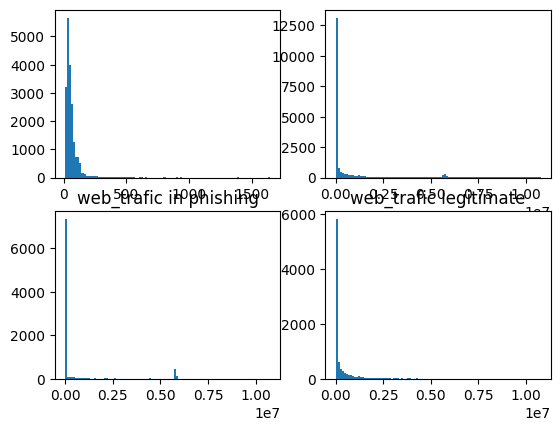

In [41]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
null = axs[0][0].hist(df['url_length'], bins=100)
null = axs[0][1].hist(df['web_traffic'], bins=100)
null = axs[1][0].hist(df[df['status'].isin(['phishing'])]['web_traffic'], bins=100)
null = axs[1][0].set_title('web_trafic in phishing')
null = axs[1][1].hist(df[df['status'].isin(['legitimate'])]['web_traffic'], bins=100)
null = axs[1][1].set_title('web_trafic legitimate')

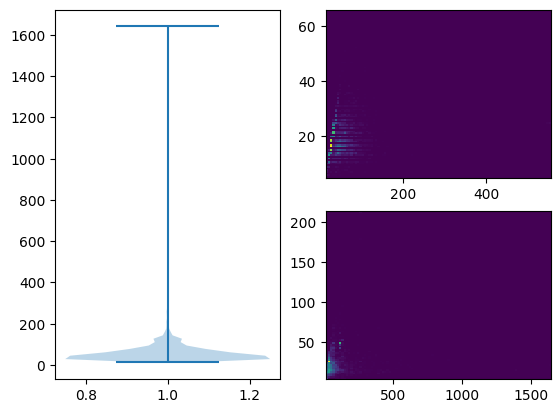

In [42]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['violin', 'right_top'],
                               ['violin', 'right_bottom']])
null = axs['right_top'].hist2d(df[df['status'].isin(['legitimate'])]['url_length'],df[df['status'].isin(['legitimate'])]['hostname_length'], bins=100)
null = axs['right_bottom'].hist2d(df[df['status'].isin(['phishing'])]['url_length'],df[df['status'].isin(['phishing'])]['hostname_length'], bins=100)
null = axs['violin'].violinplot(df['url_length'],)

A w kolejnej części zajęć rozpoczęło się dowolne przeglądanie wszystkich cech i porównywanie ich rozkładu w zależności od klasy doktórej należą

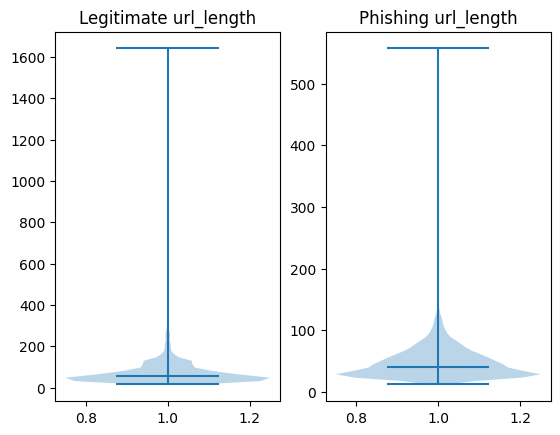

In [43]:
def compare_with_violin(feature_name):
    fig,axs = plt.subplots(1,2)

    axs[0].violinplot(df_legit[feature_name],showmeans=False,showmedians=True)
    axs[0].set_title("Legitimate "+feature_name)
    axs[1].violinplot(df_phishing[feature_name],showmeans=False,showmedians=True)
    axs[1].set_title("Phishing "+feature_name)

compare_with_violin('url_length')

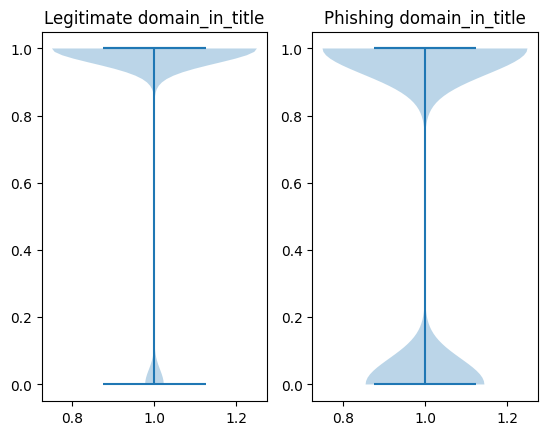

In [44]:
compare_with_violin('domain_in_title')

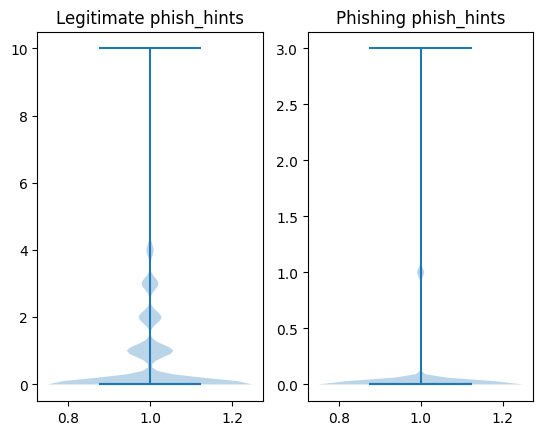

In [45]:
compare_with_violin('phish_hints')

### 4 Redukcja cech